The dataset was downloaded from [stats.govt.nz](https://www.stats.govt.nz/large-datasets/csv-files-for-download/) named "Greenhouse gas emissions by region (industry and household): Year ended 2022 – CSV".
I will use this data to explore the trends over the years of the greenhouse gas emissions in NZ.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
greenhouse_df = pd.read_csv("/Users/miyuki/Documents/Greenhouse-gas/greenhouse-gas-emissions-by-region-industry-and-household-year-ended-2022.csv")

In [4]:
greenhouse_df.head()

,region,anzsic_descriptor,sub_industry,household_category,gas,units,magnitude,year,data_val
0,Auckland,"Forestry and logging, fishing, and agricultura...",Total,Total,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,2007,45.92
1,Auckland,"Forestry and logging, fishing, and agricultura...",Total,Total,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,2008,45.88
2,Auckland,"Forestry and logging, fishing, and agricultura...",Total,Total,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,2009,43.71
3,Auckland,"Forestry and logging, fishing, and agricultura...",Total,Total,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,2010,39.61
4,Auckland,"Forestry and logging, fishing, and agricultura...",Total,Total,Carbon dioxide equivalents,Kilotonnes,Carbon dioxide equivalents,2011,40.99


In [5]:
greenhouse_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7369 entries, 0 to 7368
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   region              7369 non-null   object 
 1   anzsic_descriptor   7369 non-null   object 
 2   sub_industry        7369 non-null   object 
 3   household_category  7369 non-null   object 
 4   gas                 7369 non-null   object 
 5   units               7369 non-null   object 
 6   magnitude           7369 non-null   object 
 7   year                7369 non-null   int64  
 8   data_val            7369 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 518.3+ KB


In [6]:
greenhouse_df.describe()

,year,data_val
count,7369.00000,7369.000000
mean,2014.36260,950.204184
std,4.53792,1958.706660
min,2007.00000,0.290000
25%,2010.00000,35.990000
50%,2014.00000,143.210000
75%,2018.00000,848.500000
max,2022.00000,16707.340000


In [7]:
greenhouse_df.duplicated().sum()

0

In [8]:
greenhouse_df.nunique()

region                  17
anzsic_descriptor       19
sub_industry             5
household_category       4
gas                      5
units                    1
magnitude                1
year                    16
data_val              6741
dtype: int64

Two columns only have 1 unique value, therefore I will remove these two unnecessary columns from the dataframe. I will change the header of the data_val column to incorporate the information from the two columns ("units" and "magnitude") that only have 1 unique value.

In [9]:
#rename the data_val column
greenhouse_df.rename(columns={"data_val":"CO2_equivalent_emissions(KT)"}, inplace=True)

In [10]:
#dropping the column 'units' and 'magnitude'
greenhouse_df.drop(["units","magnitude"], axis=1, inplace=True)

In [11]:
greenhouse_df.head(10)

,region,anzsic_descriptor,sub_industry,household_category,gas,year,CO2_equivalent_emissions(KT)
0,Auckland,"Forestry and logging, fishing, and agricultura...",Total,Total,Carbon dioxide equivalents,2007,45.92
1,Auckland,"Forestry and logging, fishing, and agricultura...",Total,Total,Carbon dioxide equivalents,2008,45.88
2,Auckland,"Forestry and logging, fishing, and agricultura...",Total,Total,Carbon dioxide equivalents,2009,43.71
3,Auckland,"Forestry and logging, fishing, and agricultura...",Total,Total,Carbon dioxide equivalents,2010,39.61
4,Auckland,"Forestry and logging, fishing, and agricultura...",Total,Total,Carbon dioxide equivalents,2011,40.99
5,Auckland,"Forestry and logging, fishing, and agricultura...",Total,Total,Carbon dioxide equivalents,2012,41.13
6,Auckland,"Forestry and logging, fishing, and agricultura...",Total,Total,Carbon dioxide equivalents,2013,40.10
7,Auckland,"Forestry and logging, fishing, and agricultura...",Total,Total,Carbon dioxide equivalents,2014,41.83
8,Auckland,"Forestry and logging, fishing, and agricultura...",Total,Total,Carbon dioxide equivalents,2015,35.16
9,Auckland,"Forestry and logging, fishing, and agricultura...",Total,Total,Carbon dioxide equivalents,2016,27.23


In [12]:
greenhouse_df['anzsic_descriptor'].unique()

array(['Forestry and logging, fishing, and agricultural support services',
       'Agriculture', 'Agriculture, forestry, and fishing', 'Mining',
       'Manufacturing', 'Manufacturing and construction',
       'Electricity, gas, water, and waste services', 'Construction',
       'Wholesale and retail trade and accommodation and food services',
       'Households', 'Transport, postal, and warehousing',
       'Telecommunications, finance, rental, professional, administrative, arts and other services',
       'Government and defence, education and health care',
       'Goods-producing industries', 'Primary industries',
       'Services excluding transport, postal, and warehousing',
       'Service industries', 'Total all industries', 'Total'],
      dtype=object)

/Users/miyuki/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


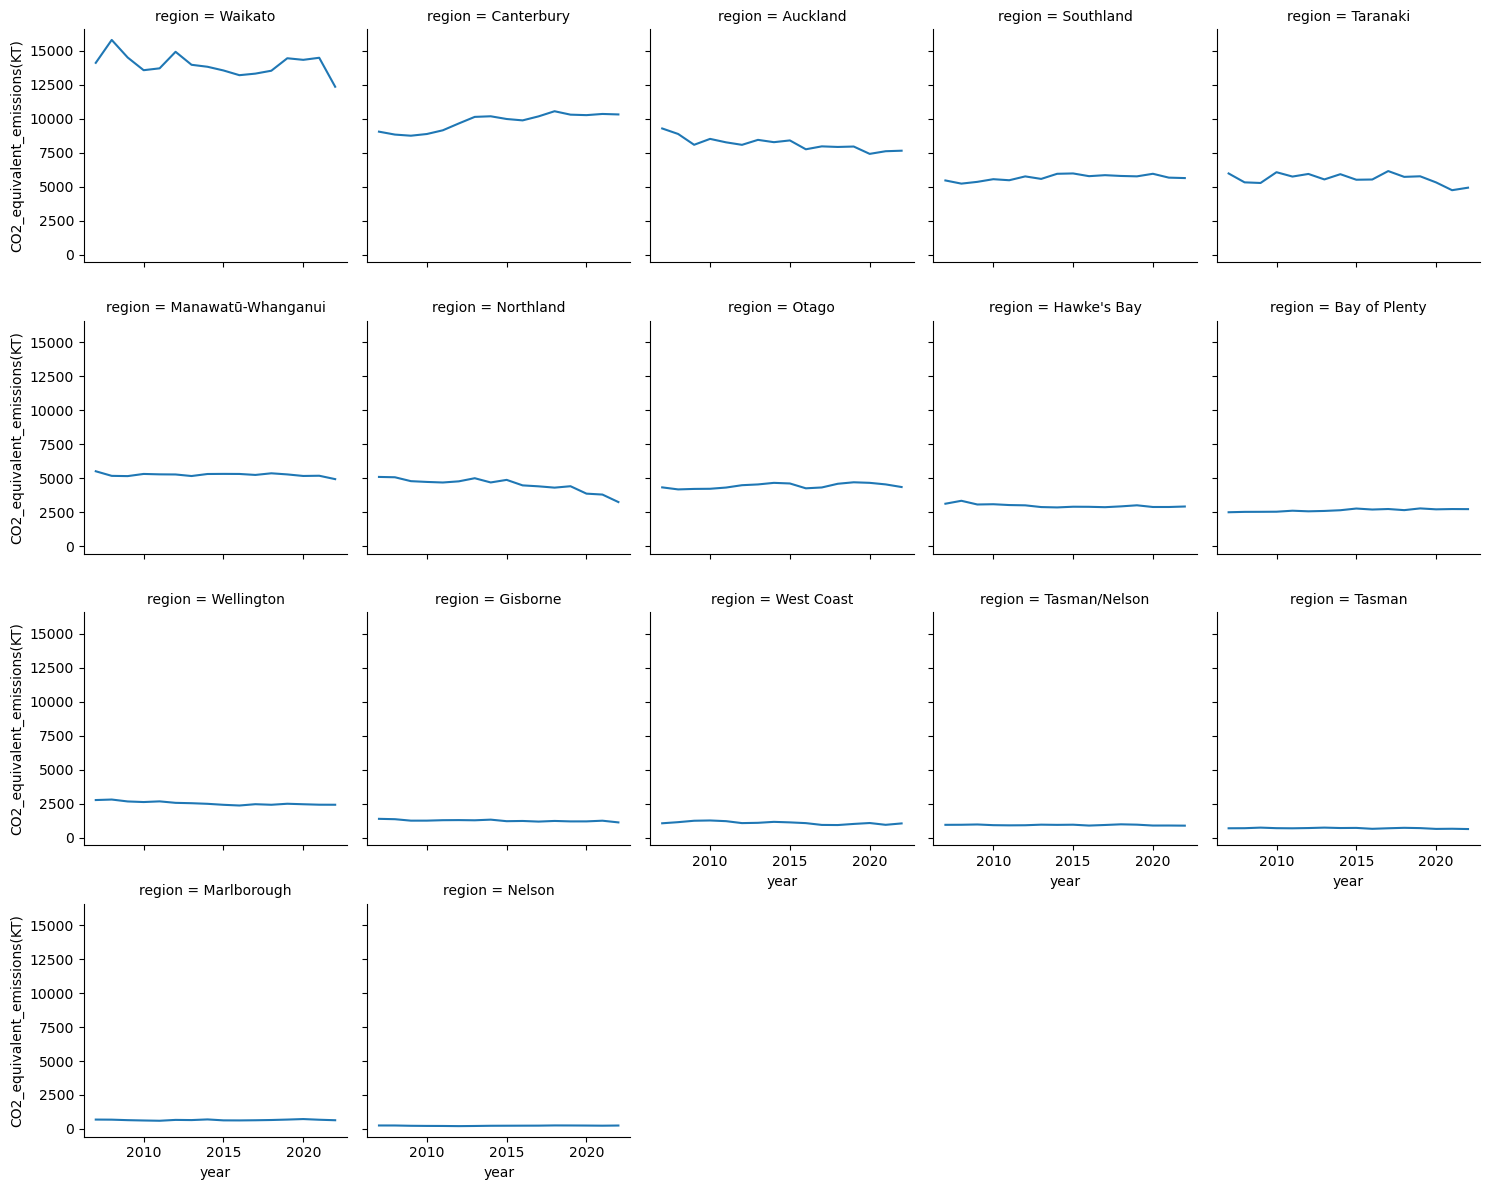

In [21]:
#create a facetplot of the total GHG emissions for each region through time
subset_df = greenhouse_df[greenhouse_df['anzsic_descriptor']=='Total all industries']

# Group by region and sum GHG emissions, then sort the regions based on total emissions
total_emissions_per_region = subset_df.groupby('region')['CO2_equivalent_emissions(KT)'].sum()
sorted_regions = total_emissions_per_region.sort_values(ascending=False).index.tolist()

g = sns.FacetGrid(data=subset_df, col='region', margin_titles=True, col_wrap=5, col_order=sorted_regions)
g.map(plt.plot, "year", "CO2_equivalent_emissions(KT)")
